# Load image, add Gaussian noise

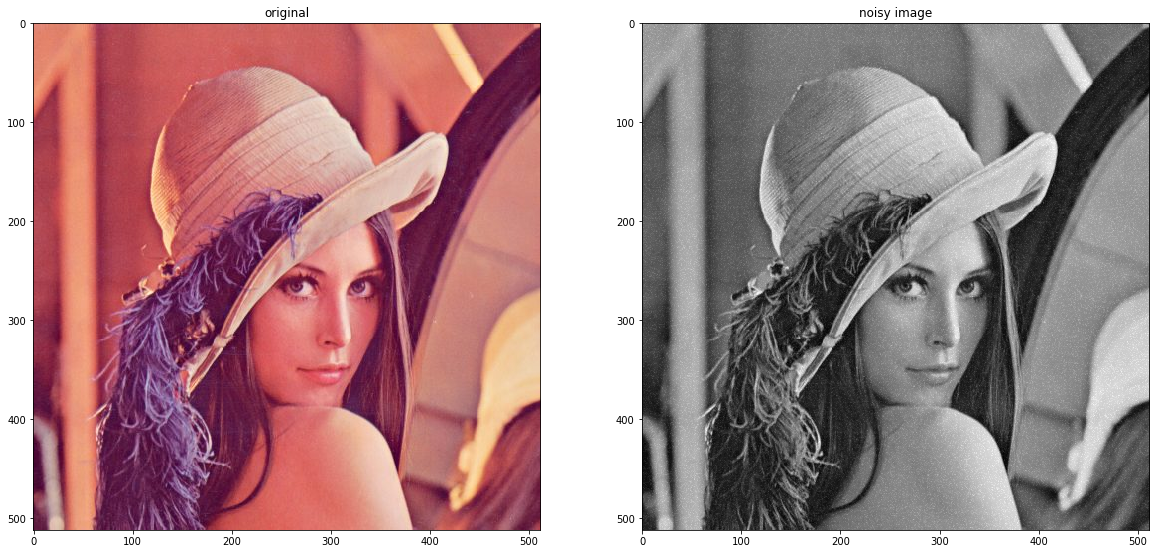

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math

%matplotlib inline

# Read in the image
image = cv2.imread('images/lena_color.jpg')

# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

# Convert to grayscale for filtering
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)

im = np.zeros(gray.shape, np.uint8) # do not use original image it overwrites the image

# Generate Gaussian noise and add it to image
mean = 0
sigma = 10
cv2.randn(im,mean,sigma) # create the random distribution
gray_noise = cv2.add(gray, im) # add the noise to the original image

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title('original')
ax1.imshow(image_copy)

ax2.set_title('noisy image')
ax2.imshow(gray_noise, cmap='gray')

# Gaussian blur the image

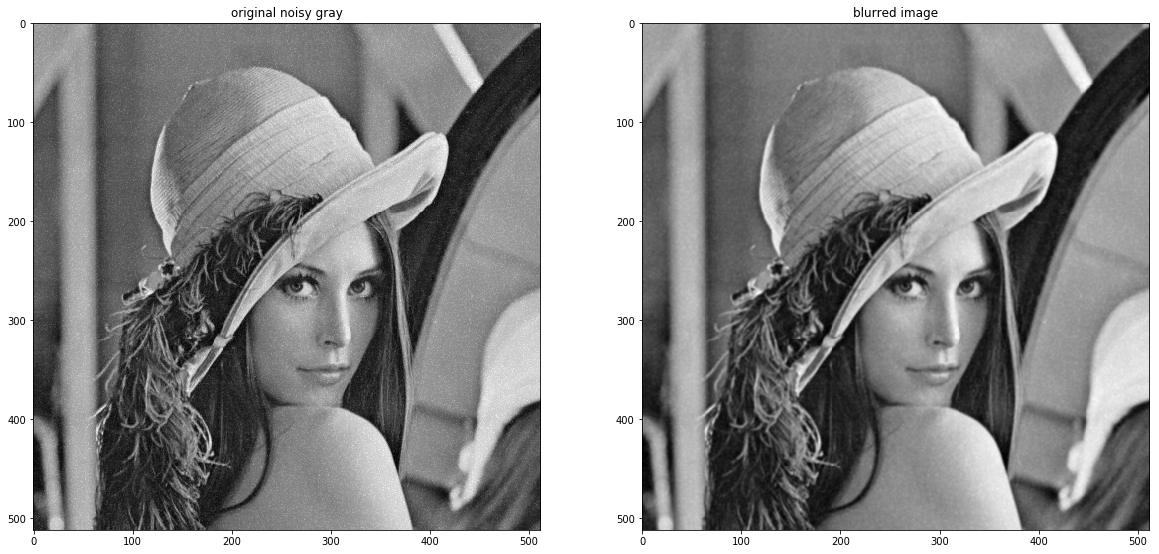

In [2]:
# Create a Gaussian blurred image
gray_blur = cv2.GaussianBlur(gray_noise, (3, 3), 0)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title('original noisy gray')
ax1.imshow(gray_noise, cmap='gray')

ax2.set_title('blurred image')
ax2.imshow(gray_blur, cmap='gray')

# Filter with the Sobel edge operator

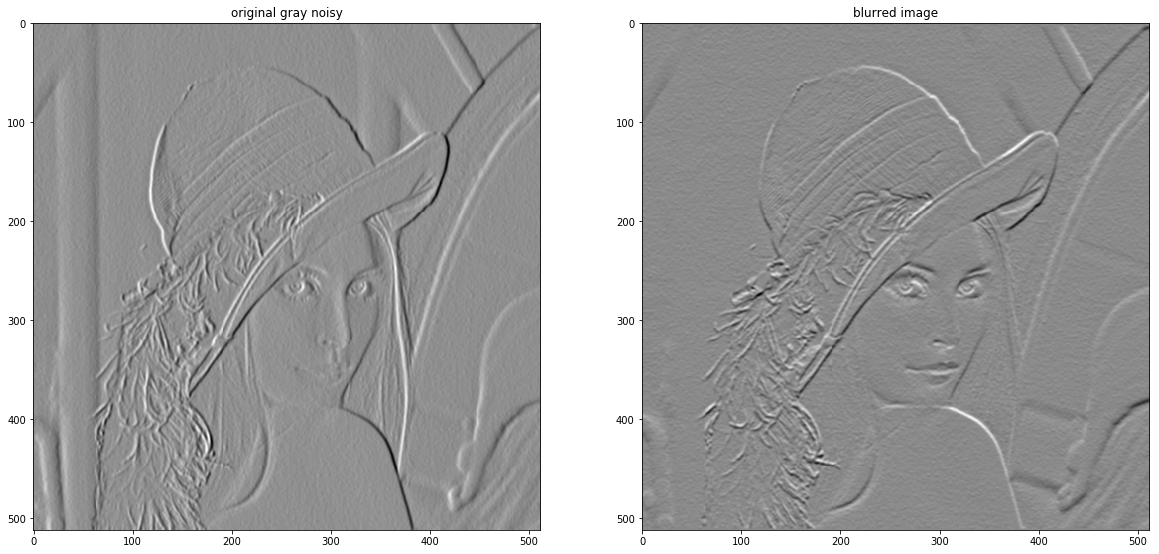

In [3]:
# 3x3 sobel filters for edge detection
sobel_x = np.array([[ -1, 0, 1], 
                   [ -2, 0, 2], 
                   [ -1, 0, 1]])


sobel_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])


# Filter the orginal and blurred grayscale images using filter2D
filtered = cv2.filter2D(gray_noise, -1, sobel_x)


dx = cv2.filter2D(gray_blur, cv2.CV_32F, sobel_x)  
dy = cv2.filter2D(gray_blur, cv2.CV_32F, sobel_y)  

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title('original gray noisy')
ax1.imshow(dx, cmap='gray')

ax2.set_title('blurred image')
ax2.imshow(dy, cmap='gray')

## TODO
## Compute the gradient magnitude and orientation image

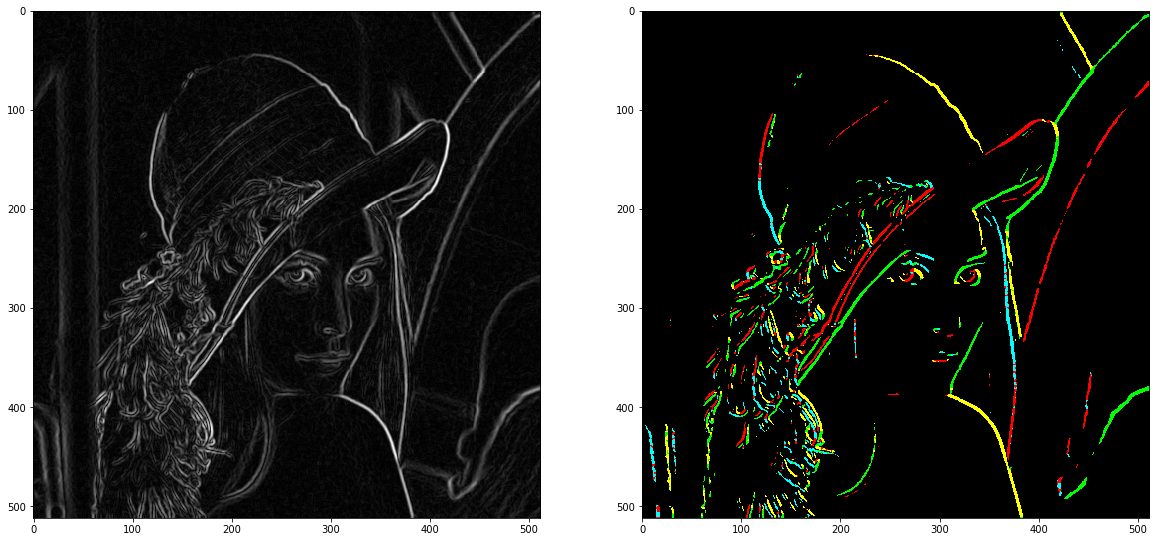

In [11]:
f, (ax3, ax4) = plt.subplots(1, 2, figsize=(20,10))

gradient_mag = ((dx)**2 + (dy)**2)**0.5
ax3.imshow(gradient_mag, cmap='gray')

orien = cv2.phase(dy, dx, angleInDegrees = True)
_, mask = cv2.threshold(gradient_mag, 150, 255, cv2.THRESH_BINARY)
image_map = np.zeros((orien.shape[0], orien.shape[1], 3), dtype=np.int16)

red = np.array([255, 0, 0])
cyan = np.array([0, 255, 255])
green = np.array([0, 255, 0])
yellow = np.array([255, 255, 0])

image_map[(mask == 255) & (orien <= 90)] = red
image_map[(mask == 255) & (orien > 90) & (orien <= 180)] = cyan
image_map[(mask == 255) & (orien > 180) & (orien <= 270)] = green
image_map[(mask == 255) & (orien > 270) & (orien <= 360)] = yellow

ax4.imshow(image_map)
